# Analyzing 911 calls in Montgomery County, Pennsylvania, USA beginning from December 2015 to present.

# Analysis-2

# Finding the various categories of emergency and analyzing the counts of emergencies during an hour, day of the week and month of the year(2016).

In [ ]:
#importing necessary libraries for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#reading the 911.csv file using pandas
df = pd.read_csv('../data/911.csv')

In [35]:
#Giving information about the csv file
# 9 data columns with their datatypes and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188751 entries, 0 to 188750
Data columns (total 9 columns):
lat          188751 non-null float64
lng          188751 non-null float64
desc         188751 non-null object
zip          165755 non-null float64
title        188751 non-null object
timeStamp    188751 non-null object
twp          188687 non-null object
addr         188751 non-null object
e            188751 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 13.0+ MB


# Displaying the beginning and end dates of the emergency calls list

In [36]:
#displaying the first 5 rows by default using head()
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [54]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year
188746,40.215457,-75.627262,SPRINGHOUSE LN & BROWNSTONE DR; CHESTER COUNT...,19465.0,EMS: CVA/STROKE,2017-04-13 20:53:18,CHESTER COUNTY,SPRINGHOUSE LN & BROWNSTONE DR,1,2017
188747,40.126467,-75.307311,BELVOIR RD & PATRIOT CIR; PLYMOUTH; Station 3...,19462.0,EMS: UNRESPONSIVE SUBJECT,2017-04-13 20:55:37,PLYMOUTH,BELVOIR RD & PATRIOT CIR,1,2017
188748,40.133037,-75.408463,SHANNONDELL DR & SHANNONDELL BLVD; LOWER PROV...,19403.0,EMS: ALTERED MENTAL STATUS,2017-04-13 21:05:46,LOWER PROVIDENCE,SHANNONDELL DR & SHANNONDELL BLVD,1,2017
188749,40.161773,-75.379843,GERMANTOWN PIKE & VALLEY FORGE RD; WORCESTER; ...,19403.0,Traffic: DISABLED VEHICLE -,2017-04-13 21:09:36,WORCESTER,GERMANTOWN PIKE & VALLEY FORGE RD,1,2017
188750,40.280610,-75.292413,MAPLE AVE & CHESTNUT ST; HATFIELD TOWNSHIP; 20...,19440.0,Fire: FIRE INVESTIGATION,2017-04-13 21:14:25,HATFIELD TOWNSHIP,MAPLE AVE & CHESTNUT ST,1,2017


# Analysis for the year 2016

In [55]:
#parsing timeStamp column from string to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

#Creating a new column for Year
df['year'] = df['timeStamp'].apply(lambda x: x.year)

#Storing all the rows with year=2016 into another dataframe df2
df2 = df[df['year'] == 2016].copy()

In [56]:
#displaying the first 5 rows of the new dataframe 'df2'
df2.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year
7916,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,2016
7917,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,2016
7918,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1,2016
7919,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1,2016
7920,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002.0,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,2016


In [39]:
#displaying the tail,i.e. last 5 rows of the df2 dataframe
df2.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year
150271,40.076383,-75.303797,FAYETTE ST & E 4TH AVE; CONSHOHOCKEN; Station...,19428.0,EMS: RESPIRATORY EMERGENCY,2016-12-31 23:22:07,CONSHOHOCKEN,FAYETTE ST & E 4TH AVE,1,2016
150272,40.296788,-75.450413,CHURCH RD & QUARRY RD; UPPER SALFORD; Station...,19438.0,EMS: SUBJECT IN PAIN,2016-12-31 23:29:04,UPPER SALFORD,CHURCH RD & QUARRY RD,1,2016
150273,40.121899,-75.288641,W GERMANTOWN PIKE & WALTON RD; PLYMOUTH; 2016-...,19462.0,Traffic: DISABLED VEHICLE -,2016-12-31 23:35:28,PLYMOUTH,W GERMANTOWN PIKE & WALTON RD,1,2016
150274,40.110192,-75.259927,LORINE LN & CAMBURN RD; WHITEMARSH; Station 3...,19462.0,EMS: OVERDOSE,2016-12-31 23:45:47,WHITEMARSH,LORINE LN & CAMBURN RD,1,2016
150275,40.000894,-75.288349,SUTTON RD & E ATHENS AVE; LOWER MERION; Stati...,19003.0,EMS: OVERDOSE,2016-12-31 23:49:35,LOWER MERION,SUTTON RD & E ATHENS AVE,1,2016


In [40]:
#creating new columns for df2 dataframe with month,hour, day of week & date and displaying the head
df2['month'] = df2['timeStamp'].apply(lambda x: x.month)
df2['hour'] = df2['timeStamp'].apply(lambda x: x.hour)
df2['day of week'] = df2['timeStamp'].apply(lambda x: x.strftime('%a'))
df2['date'] = df2['timeStamp'].apply(lambda x: x.date())
df2.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,hour,day of week,date
7916,40.121354,-75.363829,ROSEMONT AVE & W WASHINGTON ST; NORRISTOWN; S...,19401.0,EMS: ASSAULT VICTIM,2016-01-01 00:10:08,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,1,2016,1,0,Fri,2016-01-01
7917,40.140505,-75.310874,GERMANTOWN PIKE & HANNAH AVE; EAST NORRITON; ...,19401.0,EMS: FALL VICTIM,2016-01-01 00:14:45,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,1,2016,1,0,Fri,2016-01-01
7918,40.246837,-75.681381,VINE ST & CENTER ST; WEST POTTSGROVE; Station...,19464.0,EMS: ABDOMINAL PAINS,2016-01-01 00:20:43,WEST POTTSGROVE,VINE ST & CENTER ST,1,2016,1,0,Fri,2016-01-01
7919,40.097222,-75.376195,MARK LN & DEAD END; UPPER MERION; Station 317...,NaN,EMS: ALTERED MENTAL STATUS,2016-01-01 00:25:30,UPPER MERION,MARK LN & DEAD END,1,2016,1,0,Fri,2016-01-01
7920,40.148432,-75.219812,BANNOCKBURN AVE & S SPRING GARDEN ST; AMBLER;...,19002.0,EMS: DIABETIC EMERGENCY,2016-01-01 00:30:28,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,1,2016,1,0,Fri,2016-01-01


In [41]:
#finding the type of emergency by splitting the string after colon 
df2['type'] = df2['title'].apply(lambda x: x.split(':')[0])

# Counting the number of emergencies for each 'type' of  emergency in the year 2016

In [42]:
#counting the number of emergencies for each 'type' of emergency
df2['type'].value_counts()

EMS        70127
Traffic    50656
Fire       21577
Name: type, dtype: int64

# The counts show that Medical  Emergencies(EMS) were the highest in number for the year 2016 followed by Traffic and Fire

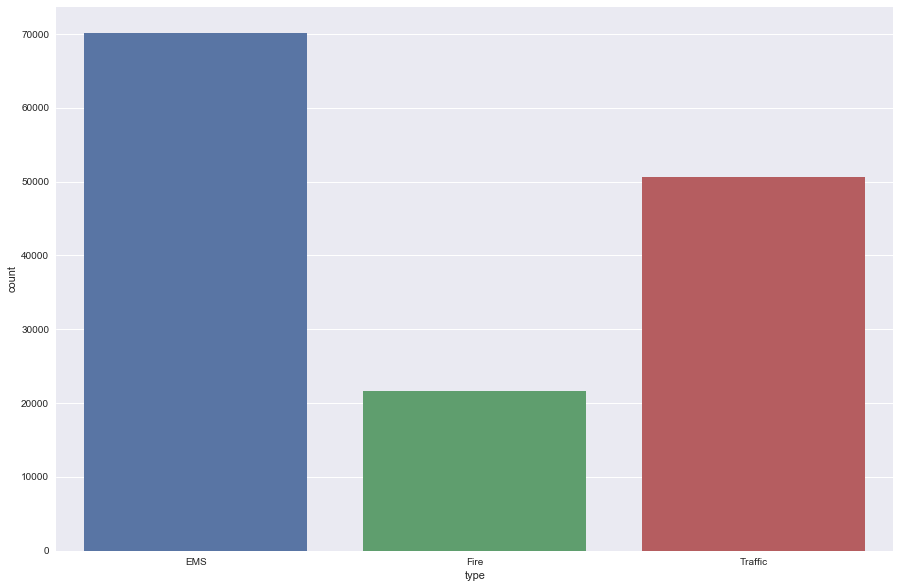

In [43]:
#Plotting a bar graph for the different types of emergencies
#countplot with 'count' on y-axis & 'type' on x-axis
plt.figure(figsize=(15,10))
sns.countplot(df2['type'])

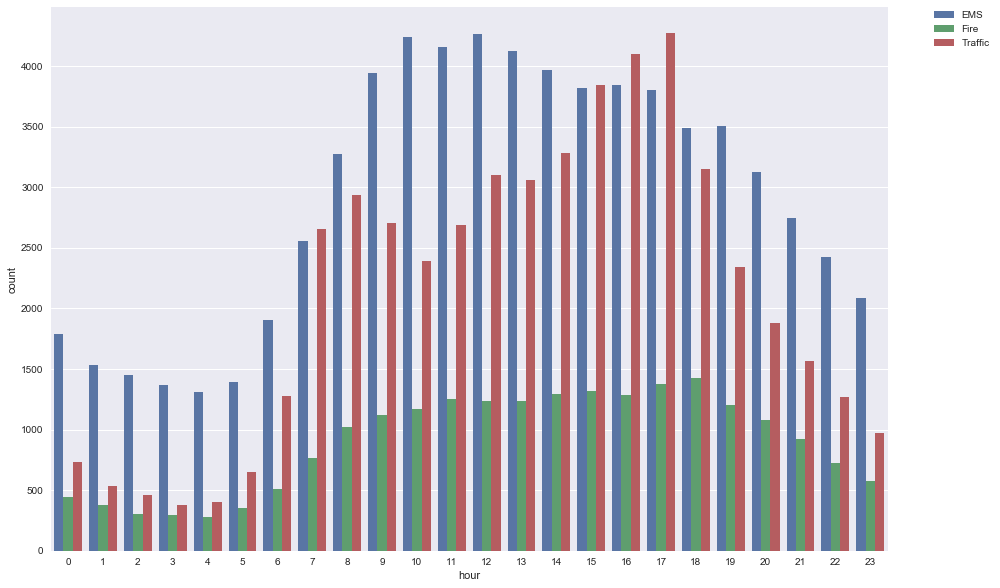

In [53]:
#plotting a bar graph for type of emergency at each hour and their respective counts
plt.figure(figsize=(15,10))
sns.countplot(df2['hour'], hue=df2['type'])

#making sure legend is displayed beside the bar without disturbing the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

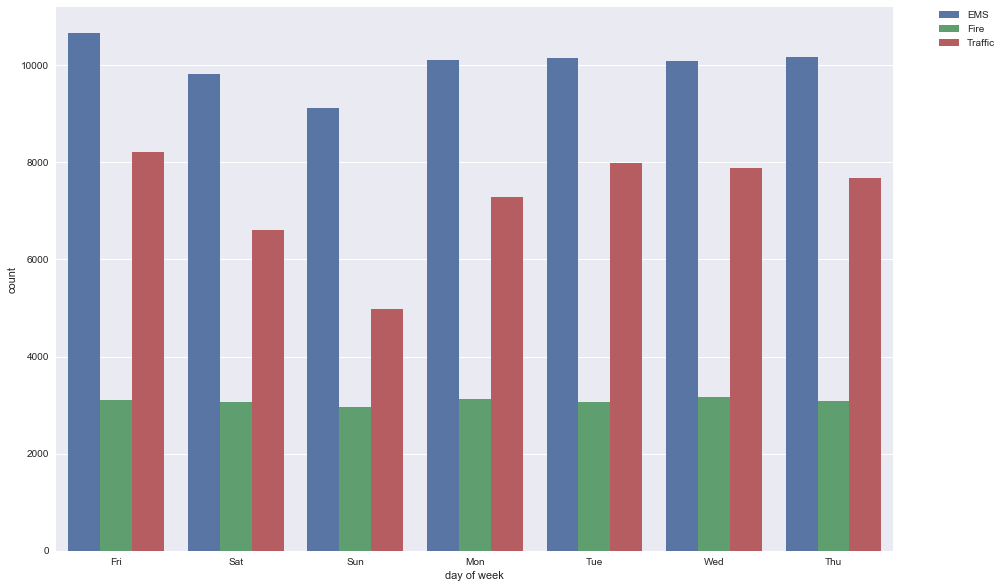

In [45]:
#plotting the bar graph for the type of emergency, day of the week and count
plt.figure(figsize=(15,10))
sns.countplot(df2['day of week'], hue=df2['type'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

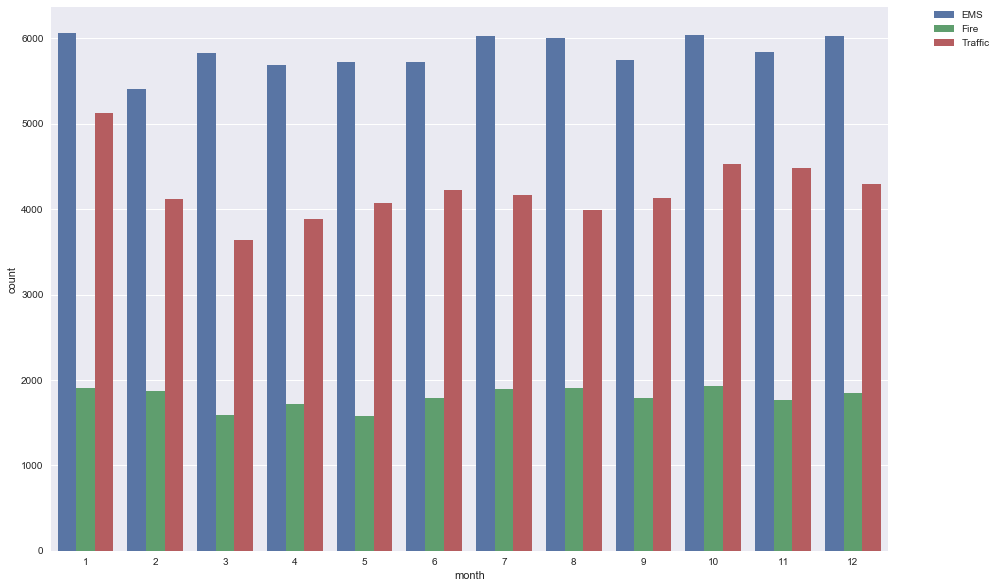

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(df2['month'], hue=df2['type'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Analyzing the number of emergency calls by township in the year 2016

In [47]:
#grouping the emergency calls by 'township' and sorting by the mean value 'e'
df2.groupby('twp').count().sort_values('e', ascending=False)[0:10]

,lat,lng,desc,zip,title,timeStamp,addr,e,year,month,hour,day of week,date,type
twp,,,,,,,,,,,,,,
LOWER MERION,12332,12332,12332,10494,12332,12332,12332,12332,12332,12332,12332,12332,12332,12332
ABINGTON,8536,8536,8536,8141,8536,8536,8536,8536,8536,8536,8536,8536,8536,8536
NORRISTOWN,8331,8331,8331,7941,8331,8331,8331,8331,8331,8331,8331,8331,8331,8331
UPPER MERION,7425,7425,7425,5151,7425,7425,7425,7425,7425,7425,7425,7425,7425,7425
CHELTENHAM,6610,6610,6610,5754,6610,6610,6610,6610,6610,6610,6610,6610,6610,6610
POTTSTOWN,5998,5998,5998,5864,5998,5998,5998,5998,5998,5998,5998,5998,5998,5998
UPPER MORELAND,4930,4930,4930,4492,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930
LOWER PROVIDENCE,4654,4654,4654,4300,4654,4654,4654,4654,4654,4654,4654,4654,4654,4654
PLYMOUTH,4460,4460,4460,3610,4460,4460,4460,4460,4460,4460,4460,4460,4460,4460


# The counts grouped by township show that 'Lower Merion' is the township with the highest mean of emergency calls and least is Horsham

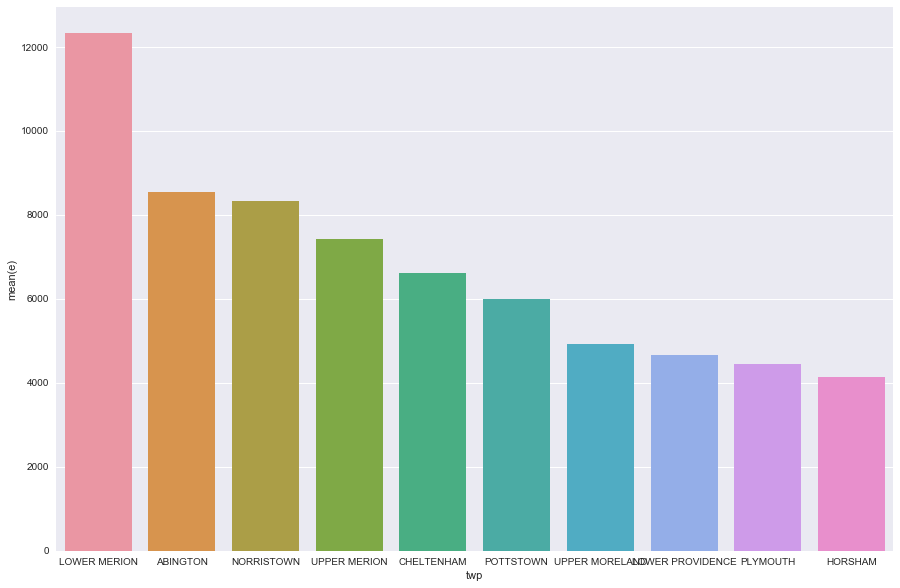

In [52]:
#plotting a bar graph for the values grouped by township and their mean value
twp = df2.groupby('twp').count().sort_values('e', ascending=False)[0:10]
plt.figure(figsize=(15,10))
sns.barplot(x='twp', y='e', data=twp.reset_index())